In [34]:
# TUGAS NAIVE BAYES ASEP RIDWAN HIDAYAT
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,log_loss
from sklearn.preprocessing import RobustScaler
import seaborn as sns # for statistical data visualization
%matplotlib inline

# select data 
df = pd.read_csv ("Data Set Adults.csv")

# tambahkan nama kolom
nama_kolom = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

# insert nama kolom ke dataframe
df.columns = nama_kolom

# tampilan data
# df.head()

In [36]:
# jadikan dataset into features dan target variable
X = df.drop(['income'], axis=1)
y = df['income']

# jadikan X  y  training dan testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# encode data supaya jadi categori
import category_encoders as encode
encoder = encode.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
20721,32,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32097,45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25205,47,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23491,37,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12367,24,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,23,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19648,19,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,43,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10799,21,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
22278,40,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8950,46,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7838,33,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16505,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19140,59,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25756,25,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21949,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26404,64,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23236,47,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# menskalakan data sesuai dengan rentang kuantil (default pada IQR: Rentang Interkuartil).agar tidak ada outlier
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


In [7]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
0,-0.25,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

GaussianNB()

In [38]:
y_pred = gnb.predict(X_test)

# y_pred

In [39]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('\nConfusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])


Confusion matrix
 [[5970 1484]
 [ 409 1905]]
True Positives(TP) =  5970
True Negatives(TN) =  1905
False Positives(FP) =  1484
False Negatives(FN) =  409


<Axes: >

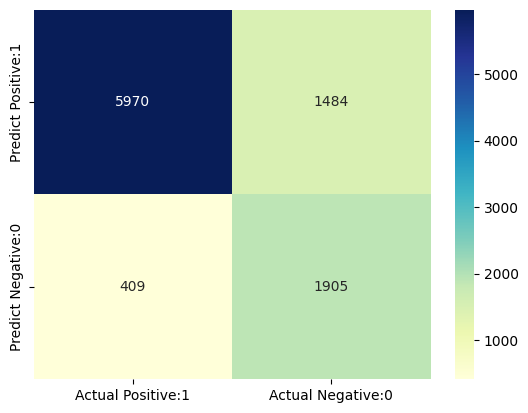

In [40]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [18]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


5970

In [41]:
#Ambil nilai CA
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8062


In [42]:
# Ambil nilai precision 
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8009


In [43]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9359


In [44]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5621


In [45]:
f1 = 2 * (precision * recall) / (precision + recall)
print('f1 : {0:0.4f}'.format(f1))

f1 : 0.8632


In [46]:
# Menghitung MCC (Matthews correlation coefficient)
mcc = (TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
print('mcc {0:0.4f}'.format(mcc))

mcc 0.5575


In [31]:
# logloss = log_loss(y_test, y_pred)
y_test


22278      >50K
8950      <=50K
7838      <=50K
16505     <=50K
19140     <=50K
          ...  
25756     <=50K
21949      >50K
26404      >50K
23236     <=50K
26822     <=50K
Name: income, Length: 9768, dtype: object

In [47]:
# didapat y prediksi
y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [48]:
# precission dg sklearn
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86      7454
        >50K       0.56      0.82      0.67      2314

    accuracy                           0.81      9768
   macro avg       0.75      0.81      0.77      9768
weighted avg       0.85      0.81      0.82      9768



In [51]:
# kalkulasi perhitungan probabilitas
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob untuk - <=50K', 'Prob untuk - >50K'])

y_pred_prob_df

,Prob untuk - <=50K,Prob untuk - >50K
0,0.052394,9.476057e-01
1,0.999967,3.299750e-05
2,1.000000,6.660489e-08
3,1.000000,1.710252e-09
4,0.999768,2.322801e-04
5,0.102520,8.974804e-01
6,1.000000,4.385488e-08
7,0.999306,6.942859e-04
8,0.983857,1.614286e-02
9,1.000000,3.820080e-10


In [52]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

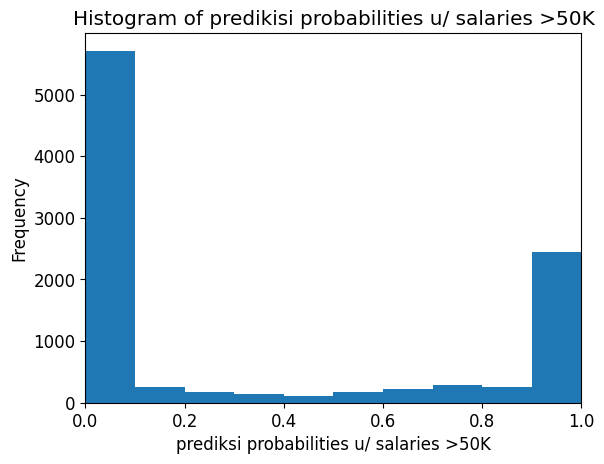

In [54]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predikisi probabilities u/ salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('prediksi probabilities u/ salaries >50K')
plt.ylabel('Frequency')